Caixeiro viajante
=================



## Introdução



Até agora, sempre que nós aplicamos os operadores de `cruzamento` ou de `mutação` nós não nos preocupamos se o indivíduo gerado por estes processo era um `indivíduo válido`. Um indivíduo válido é aquele que representa uma solução possível e bem formulada para o problema em questão.

Por exemplo, no problema das caixas binárias, [1, 0, 0, 1] é um indivíduo válido para o caso de termos 4 caixas. Um exemplo de `indivíduo inválido` para este mesmo problema seria [1, 0, 0, a], pois um dos genes está assumindo um valor fora do domínio. Outro exemplo de indivíduo inválido poderia ser [1, 1, 0], pois é um indivíduo com apenas 3 genes, sendo que o esperado eram 4 genes.

Neste experimento nós veremos estratégias para evitar que indivíduos inválidos sejam obtidos quando usamos os operadores de cruzamento e de mutação. No notebook seguinte veremos como aplicar uma penalidade para indivíduos inválidos que forem gerados durante uma busca genética com restrições.



## Objetivo



Encontrar uma solução para o problema do caixeiro viajante. Considere que ele irá visitar 5 cidades, pode iniciar sua viagem por qualquer uma destas cidades e deve retornar à cidade de início. Durante seu trajeto, não pode visitar a mesma cidade duas vezes (única exceção é a cidade inicial).



## Descrição do problema



O problema consiste em descobrir a rota de menor distância entre $n$ pontos no plano cartesiano (ou seja, $n$ pontos com coordenadas $(x,y)$). A rota pode se iniciar em qualquer um dos pontos disponíveis e deve terminar no ponto inicial, visitando todos os demais pontos apenas uma vez. Considere que a rota entre um ponto e outro é a linha reta que liga os dois pontos.

O código abaixo é um gerador de coordenadas de cidades. Use ele caso queira.



## Importações



In [2]:
import random
from itertools import permutations

from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_torneio_min as funcao_selecao 
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [3]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido

NUMERO_DE_CIDADES = 10
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [4]:
#Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [5]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:        
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = menor_fitness 
        
#Código feito em conjunto com o professor Daniel Cassar durante a aula

In [6]:
# Busca testando todas as permutações

melhor_fitness_ever = float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia < melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho
        
#Código feito em conjunto com o professor Daniel Cassar durante a aula

In [7]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)

#Código feito em conjunto com o professor Daniel Cassar durante a aula


Melhor individuo obtido por algoritmos genéticos:
['Cidade 6', 'Cidade 9', 'Cidade 5', 'Cidade 7', 'Cidade 4', 'Cidade 3', 'Cidade 2', 'Cidade 8', 'Cidade 1', 'Cidade 0'] com distância: 2.9333494443153803

Melhor individuo obtido por busca exaustiva:
('Cidade 1', 'Cidade 0', 'Cidade 6', 'Cidade 9', 'Cidade 4', 'Cidade 7', 'Cidade 5', 'Cidade 3', 'Cidade 2', 'Cidade 8') com distância: 2.9333494443153803


## Conclusão



O experimento 6 teve como objetivo aplicar os algoritmos genéticos para o problema do caixeiro viajante. Tinhamos como hipótese inicial que resolver esse problema utilizando esta técnica tornaria a chegada no resultado mais rápida e com menor gasto computacional do que ao fazer utilizando outros métodos como a busca exaustiva. Antes de iniciar a explicação do que foi feito, precisamos entender o que é o problema do caixeiro viajante. Esse problema consiste em uma pessoa que deseja fazer um trajeto passando por algumas cidades diferentes utilizando o caminho mais curto possível, isso sem passar duas vezes pela mesma cidade. 
	
Então, para atingir o objetivo do experimento foi necessário construir algumas funções. Dentre elas, as que julgo mais relevante apresentar aqui é a função que calcula a distância entre as cidades, a de mutação e a função objetivo. A função de distância estruturou se no cálculo euclidiano a partir de dois pontos referentes ao eixo "x" do plano cartesiano e dois que referem-se ao eixo "y". A função mutação para esse problema foi diferente da utilizada anteriormente, sendo ela não simples, devido a limitações do problema em que uma mesma cidade não pode ser repitida. Por fim, a função objetivo do experimento estruturou-se em um loop que cálcula as distâncias obtidas nos diferentes caminhos possíveis e, então, por se tratar de um problema de minimização, retorna o caminho com a menor distância possível.
	
No final, por comparação com a busca exaustiva, não conseguimos obter um resultado significante para justificar a maior eficiência do algoritmo genético testando com um número igual ou menor que cinco cidades. No entanto, a partir de 7 cidades foi possível perceber uma demora maior da busca exaustiva para rodar o código enquanto que o algoritmo genético continuava tão rápido quanto com poucas cidades.
	
Com todo esse experimento aprendi uma nova forma de aplicar os algoritmos genéticos, a importância de se atentar a função de mutação que será utilizada no problema.

Comentário: Professor, estou tendo bastante dificuldade em acompanhar o raciocínio para a construção do código. Parece que entendo quando te vejo fazendo, mas na hora de fazer sozinha fica muito difícil. Você tem sugestões do que posso fazer para melhorar?

## Playground



In [10]:
import matplotlib.pyplot as plt

In [11]:
#Criando grafo ilustrativo do problema

grafo_do_caminho = [] 

for i in melhor_resposta_ever:
    grafo_do_caminho.append(CIDADES[str(i)])
print(grafo_do_caminho)

[(0.1989582139856596, 0.9925806754475868), (0.9526073243111554, 0.3964033737962984), (0.8780376740802165, 0.2911547456687972), (0.8321741486430534, 0.2910773824945221), (0.7257763996740106, 0.25045337555391733), (0.4966398599160283, 0.19077442623043295), (0.07203497786537227, 0.03352123481378144), (0.0692499095898994, 0.24064575850118153), (0.0663568388023913, 0.29216297122514945), (0.21341471359403186, 0.5866402606040817)]


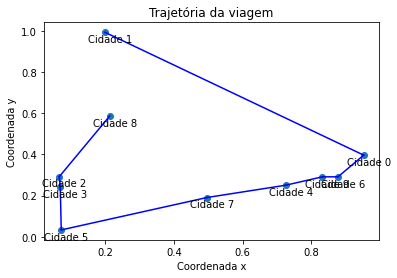

In [12]:
#Dando nome a cada um dos pontos que compõem a localização das cidades

x = [ponto[0] for ponto in grafo_do_caminho]
y = [ponto[1] for ponto in grafo_do_caminho]

for n, nome in enumerate(melhor_resposta_ever):
    plt.annotate(nome, (x[n], y[n]), textcoords = "offset points", xytext=(5, -10), ha='center')
    
#Plotando os pontos

plt.scatter(x,y)

#liga os pontos com segmentos de reta

for e in range(len(grafo_do_caminho)-1):
    plt.plot([grafo_do_caminho[e][0], grafo_do_caminho[e+1][0]], [grafo_do_caminho[e][1], grafo_do_caminho[e+1][1]], 'b-')
    
#Dando nome aos eixos

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Trajetória da viagem')

plt.show()